# Week 7 - Dimensionality Reduction and Feature Selection

## Learning Objectives

* Introduce dimensionality reduction problem and different numeric methods available in scikit-learn
* General overview of feature selection problem and tools bundled in scikit-learn


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn.metrics
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.cluster
import sklearn.feature_selection
import sklearn.ensemble
import sklearn.svm
import sklearn.model_selection

# from sklearn import linear_model

%matplotlib inline

## Features and high-dimensional spaces

Many types of data can contain a large number of variables (features in terms of ML). Dimensionality of the problem is essentially equal to the number of features as data could be interpreted as points in a high-dimensional space. Example of a 30D benign-vs-malignant classification problem: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer. Whether this is individual pixels in images, transcripts or genes/proteins in -omics data or word occurrences in text data a large number of features poses several challenges. 

In particular, visualizing more than three dimensions is difficult complicating our data analysis and exploration. Moreover, in machine learning models a large number of features translates directly into a large number of free parameters. Thus, there is a risk of overfitting the models to the data, and having a model that does not generalize to new observations. An obvious solution to address these challenges would be reducing the number of features and, consequantly, the dimensionality of the feature space. There are two approaches:

* Transform the data into a lower dimensional space (dimensionality reduction)
* Feature elimination (discard less important features) or feature selection (select more important features)


## 1. Dimensionality reduction

There are three fundamentally different ways of transforming the feature space:
* Decomposition -- a set of frameworks for finding optimal linear projections of data onto lower dimensional space without losing much information about the structure within the data. These linear frameworks include Principal Component Analysis (PCA), Independent Component Analysis (ICA), Linear Discriminant Analysis (LDA), Factor Analysis (FA), Dictionary Learning, Non-negative matrix factorization (NMF), etc.
    
* Manifold Learning -- optimal for finding non-linear structure in data, however it may not be able to apply transformation to new data points. Typically it is an unsupervised machine learning problem - no predetermined classification is required. Methods include: Isomap, Locally Linear Embedding (LLE), Spectral Embedding, Multi-dimensional scaling (MDS), t-distributed Stochastic Neighbor Embedding (t-SNE), etc.

The main assumption is that the features in a lower-dimensional space (latent variables) represent the true structure of the data despite the large number of observed variables in the original data.

See examples:
* Visualizing high-dimensional data with Tensorflow: https://aiexperiments.withgoogle.com/visualizing-high-dimensional-space

* See scikit example: http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html


### 1.1 Example: Synthetic dataset with 7D

(30, 7)


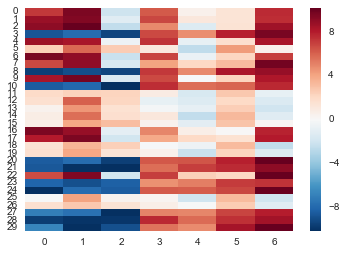

In [2]:
# sklearn.datasets.make_sparse_uncorrelated

X, y = sklearn.datasets.make_blobs(n_samples=30, centers=3, n_features=7, random_state=0)
print(X.shape)
sns.heatmap(X, robust=True, square=False, yticklabels=True, xticklabels=True, cbar=True)
plt.show()

# D = pairwise_distances(X, metric='euclidean', n_jobs=-1)
# sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
# plt.show()

# plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.75)
# plt.xlabel('Pairwise distances')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [3]:
def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

### 1.2 Non-linear transformations

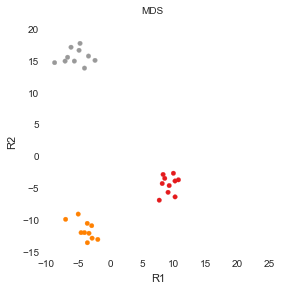

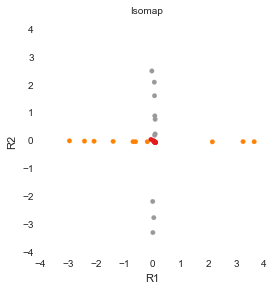

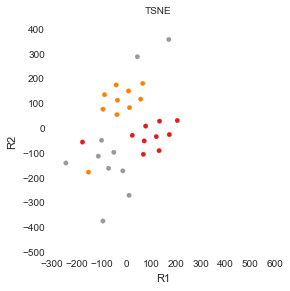

In [4]:
# examples of non-linear transformations:

# NOTE THAT THERE IS NO transform(X)

R_MDS = sklearn.manifold.MDS(n_components=2).fit_transform(X)
scatterplot_2D(R_MDS, 'MDS', y)


R_ISO = sklearn.manifold.Isomap(n_components=2).fit_transform(X)
scatterplot_2D(R_ISO, 'Isomap', y)


R_TSNE = sklearn.manifold.TSNE(n_components=2, perplexity=10.0).fit_transform(X)
scatterplot_2D(R_TSNE, 'TSNE', y)

### 1.3 Projection to 2D via decomposition

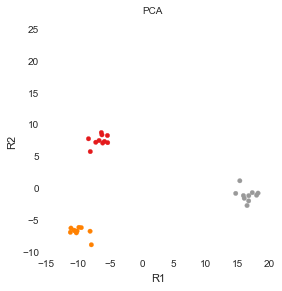

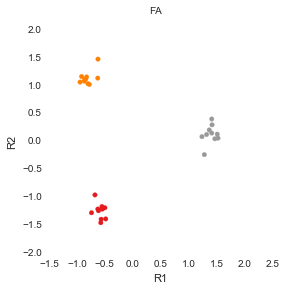

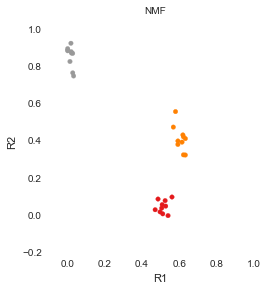

In [5]:
# Examples of projection to 2D via decomposition

# NOTE THAT THERE IS transform(X)

# Principal Component Analysis
R_PCA = sklearn.decomposition.PCA(n_components=2).fit_transform(X)
scatterplot_2D(R_PCA, 'PCA', y)

# Factor Analysus
R = sklearn.decomposition.FactorAnalysis(n_components=2).fit_transform(X)
scatterplot_2D(R, 'FA', y)

# Nonnegative matrix factorization
# NMF requires non-negative values
X_nonnegative = sklearn.preprocessing.MinMaxScaler().fit_transform(X)
R_NMF = sklearn.decomposition.NMF(n_components=2).fit_transform(X_nonnegative)
scatterplot_2D(R_NMF, 'NMF', y)

###  1.4 Clustering in transformed feature space

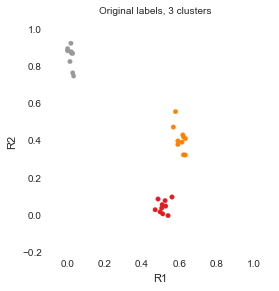

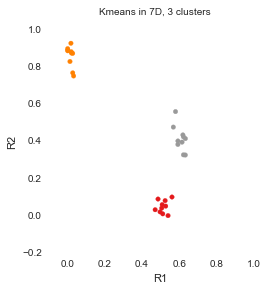

[1 1 1 2 1 0 1 1 2 1 2 0 0 0 0 0 1 1 0 0 2 2 1 2 2 0 0 2 2 2]
[2 2 2 1 2 0 2 2 1 2 1 0 0 0 0 0 2 2 0 0 1 1 2 1 1 0 0 1 1 1]
V measure 1.0
Adj. Rand score 1.0


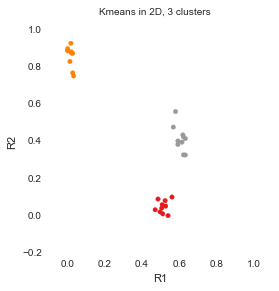

[1 1 1 2 1 0 1 1 2 1 2 0 0 0 0 0 1 1 0 0 2 2 1 2 2 0 0 2 2 2]
[2 2 2 1 2 0 2 2 1 2 1 0 0 0 0 0 2 2 0 0 1 1 2 1 1 0 0 1 1 1]
V measure 1.0
Adj. Rand score 1.0


In [6]:
# from sklearn.metrics.cluster import v_measure_score, adjusted_rand_score

# Original labels:
scatterplot_2D(R_NMF, 'Original labels, 3 clusters', y)

# Clustering the original 7D dataset with KMeans
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(X)
scatterplot_2D(R_NMF, 'Kmeans in 7D, 3 clusters', kmeans.labels_)
print(y)
print(kmeans.labels_)
print("V measure", sklearn.metrics.cluster.v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", sklearn.metrics.cluster.adjusted_rand_score(y, kmeans.labels_))

# Clustering 2D dataset
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(R_NMF)
scatterplot_2D(R_NMF, 'Kmeans in 2D, 3 clusters', kmeans.labels_)
print(y)
print(kmeans.labels_)
print("V measure", sklearn.metrics.cluster.v_measure_score(y, kmeans.labels_))
print("Adj. Rand score", sklearn.metrics.cluster.adjusted_rand_score(y, kmeans.labels_))

###  1.5 Transforming pairwise dissimilarities between objects into feature space

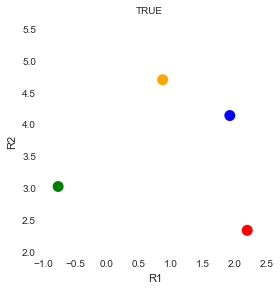

Stress 0.0039309872023


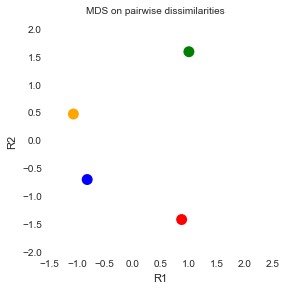

In [7]:
# Original data points (can be unknown)
X, y = sklearn.datasets.make_blobs(n_samples=4, centers=3, n_features=2, random_state=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(X[...,0], X[...,1], c=("red", "green", "blue", "orange"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')
ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.suptitle("TRUE")
plt.show()

# Pairwise dissimilarities
D = sklearn.metrics.pairwise_distances(X, metric = 'euclidean')
####################################################################################

M = sklearn.manifold.MDS(n_components=2, n_init=1, max_iter=10000, metric=True, dissimilarity="precomputed")
K = M.fit_transform(D)
print("Stress", M.stress_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(K[...,0], K[...,1], c=("red", "green", "blue", "orange"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')
ax.set_xlabel('R1')
ax.set_ylabel('R2')
fig.suptitle("MDS on pairwise dissimilarities")
plt.show()

### 1.6. Example: NMF decomposition of Gene expression in Breast Cancer (BRCA)

In [8]:
from pathlib import Path

ICGC_API = 'https://dcc.icgc.org/api/v1/download?fn=/release_18/Projects/BRCA-US/'

# clinical_fname = 'clinical.BRCA-US.tsv.gz'
# if not Path(clinical_fname).is_file():
#     urllib.request.urlretrieve(ICGC_API + 'clinical.BRCA-US.tsv.gz', clinical_fname);

expression_fname = 'protein_expression.BRCA-US.tsv.gz'
if not Path(expression_fname).is_file():
    urllib.request.urlretrieve(ICGC_API + 'protein_expression.BRCA-US.tsv.gz', expression_fname);

E = pd.read_csv(expression_fname, delimiter='\t')
E.head(1)

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,antibody_id,gene_name,gene_stable_id,gene_build_version,normalized_expression_level,verification_status,verification_platform,platform,experimental_protocol,raw_data_repository,raw_data_accession
0,DO4143,BRCA-US,SP8807,SA11426,TCGA-A1-A0SK-01A-21-A13A-20,10694,PAI-1,SERPINE1,NaN,NaN,1.769954,not tested,NaN,M.D. Anderson Reverse Phase Protein Array Core,MDA_RPPA_Core http://tcga-data.nci.nih.gov/tcg...,TCGA,TCGA-A1-A0SK-01A-21-A13A-20


In [9]:
donors = set(E['icgc_donor_id'])
genes = set(E['gene_name'])
print("Donors (data points):", len(donors))
print("Genes (features): ", len(genes))

Donors (data points): 298
Genes (features):  115


In [10]:
donor2id = {donor: i for i, donor in enumerate(donors)}
id2donor = dict(zip(donor2id.values(), donor2id.keys()))

gene2id = {gene: i for i, gene in enumerate(genes)}
id2gene = dict(zip(gene2id.values(), gene2id.keys()))

data = np.zeros((len(donors), len(genes)))
for i in range(len(E)):
    data[donor2id[E.loc[i, 'icgc_donor_id']], gene2id[E.loc[i, 'gene_name']]] = float(E.loc[i, 'normalized_expression_level'])

data = sklearn.preprocessing.MinMaxScaler().fit_transform(data)

V ~ W dot H + error
Error =  19.28967623232232
V =  (298, 115)
W =  (10, 115)
H =  (298, 10)


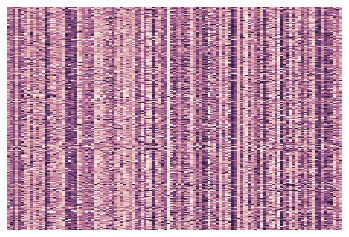

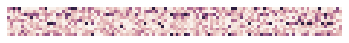

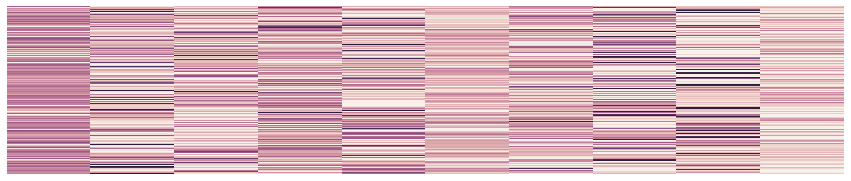

In [11]:
# NMF DECOMPOSITION

rank = 10
nmf = sklearn.decomposition.NMF(n_components=rank).fit(data)
V = data
W = nmf.components_
H = nmf.transform(data)
print("V ~ W dot H + error")
print("Error = ", nmf.reconstruction_err_)
print("V = ", V.shape)
print("W = ", W.shape)
print("H = ", H.shape)

sns.heatmap(V, robust=True, square=False, yticklabels=False, xticklabels=False, cbar=False)
plt.show()
g, ax = plt.subplots(figsize=(6,6))
sns.heatmap(W,  robust=True, square=True, yticklabels=False, xticklabels=False, cbar=False)
plt.show()
g, ax = plt.subplots(figsize=(15, 3))
sns.heatmap(H, robust=True,  square=False, yticklabels=False, xticklabels=False, cbar=False)
plt.show()

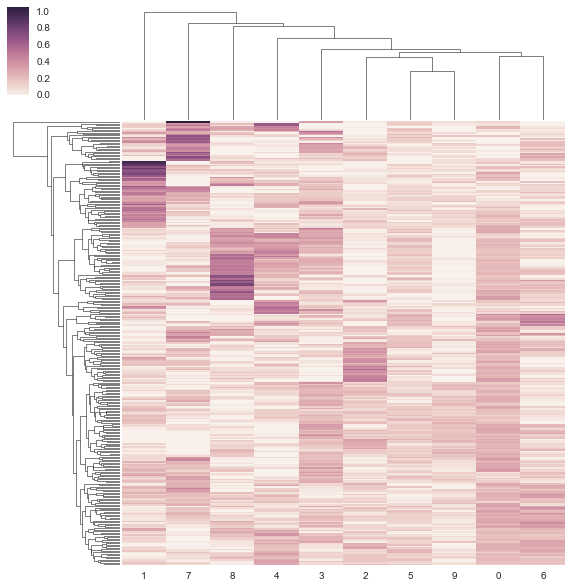

In [12]:
# Clustering in reduced feature space

sns.clustermap(H, xticklabels=True, yticklabels=False)
plt.show()

Features in the transformed space -- latent variables -- represent groups of genes with similar protein expression patterns in Breast Cancer. These could be, for instance, genes involved in the same pathway.

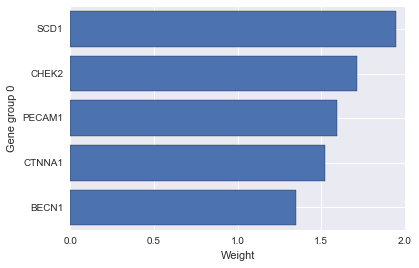

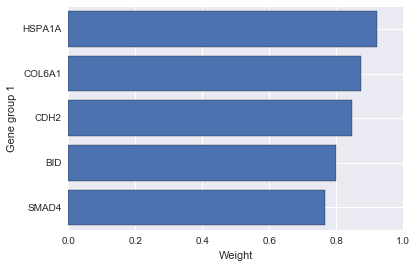

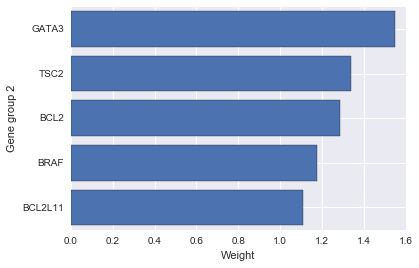

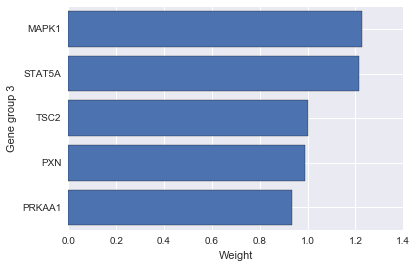

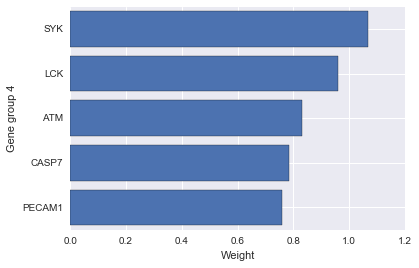

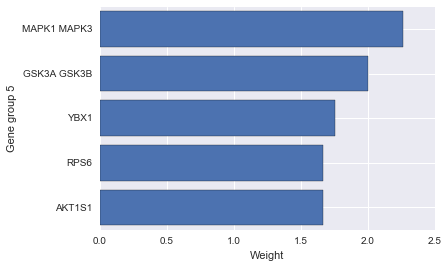

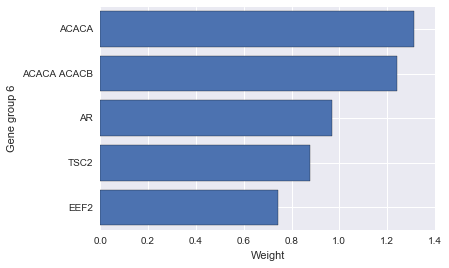

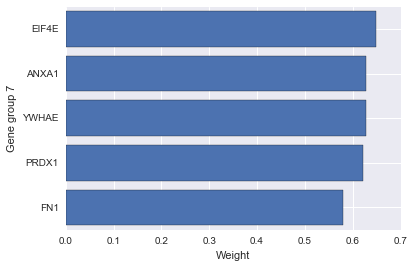

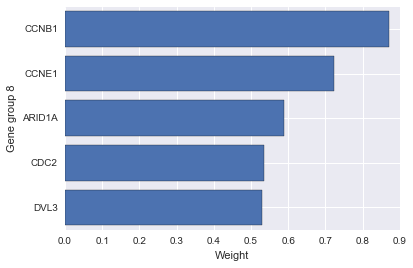

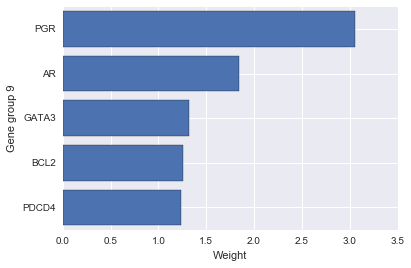

In [18]:
# Show top 5 genes in each gene group

for gene_group in range(H.shape[1]):
    k = 5
    topk = np.argsort(np.asarray(W[gene_group, :]).flatten())[-k:]
    # print("Indices of related genes", topk)
    val = W[gene_group, topk]
    # print("Gene weights", val)
    plt.barh(np.arange(k) + .5, val, align="center")
    labels = [id2gene[idx] for idx in topk]
    plt.yticks(np.arange(k) + .5, labels)
    plt.xlabel("Weight")
    plt.ylabel("Gene group {}".format(gene_group));
    plt.show()

## 2. Feature Selection

[Feature selection](http://scikit-learn.org/stable/modules/feature_selection.html) can be used to choose the most informative features. This can improve the performance of subsequent models, reduce overfitting and have practical advantages when the model is ready to be utilized.

There are a variety of approaches for feature selection:

* Remove uninformative features (same value for all, or nearly all, samples)
* Remove features that perform poorly at the task when used alone
* Iteratively remove the weakest features from a model until the desires number is reached


### 2.1 Thresholds and KBest

In [19]:
X = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]])
print(X)

sel = sklearn.feature_selection.VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected = sel.fit_transform(X)
print(X_selected)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]
[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


In [20]:
iris = sklearn.datasets.load_iris()
X, y = iris.data, iris.target
print(X.shape)
print(y)

X_new = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=2).fit_transform(X, y)
print(X_new.shape)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 2)


### 2.2 Feature selection and model selection

When iteratively removing weak features the choice of model ![](http://scikit-learn.org/stable/_images/math/334dd847bce79ed52a760f02b3efd8faefdb6e8b.png) is important and  LASSO (least absolute shrinkage and selection operator) L1 regularization should be used:

* L1 regularization penalizes large coefficients based on their absolute values. This favors a sparse model with weak features having coefficients close to zero:

![](http://scikit-learn.org/stable/_images/math/07c30d8004d4406105b2547be4f3050048531656.png)


* In contrast, L2 regularization (Ridge regression/Tikhonov regularization) penalizes large coefficients based on their squared value, and this has a tendency to favor many small coefficients rather than a smaller set of larger coefficients.
![](http://scikit-learn.org/stable/_images/math/48dbdad39c89539c714a825c0c0d5524eb526851.png)


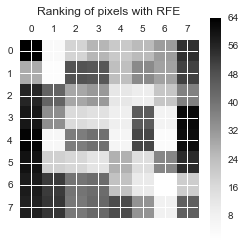

In [21]:
# Load the digits dataset
digits = sklearn.datasets.load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE (Recursive feature elimination) object and rank each pixel
clf = sklearn.linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
rfe = sklearn.feature_selection.RFE(estimator=clf, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking) # cmap=plt.get_cmap('summer')
plt.colorbar()
plt.title("Ranking of pixels with RFE\n")
plt.show()

The disadvantage with L1 regularization is that if multiple features are correlated only one of them will have a high coefficient.

Randomized Logistic Regression works by subsampling the training data and fitting a L1-penalized LogisticRegression model where the penalty of a random subset of coefficients has been scaled. By performing this double randomization several times, the method assigns high scores to features that are repeatedly selected across randomizations. This is known as stability selection. In short, features selected more often are considered good features.

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RandomizedLogisticRegression.html


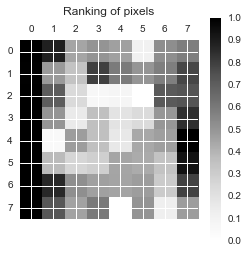

In [22]:
randomized_logistic = sklearn.linear_model.RandomizedLogisticRegression()
randomized_logistic.fit(X, y)
ranking = 1.0 - randomized_logistic.scores_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking)
plt.colorbar()
plt.title("Ranking of pixels\n")
plt.show()

Also important is to normalize the means and variances of the features before comparing the coefficients.

A limitation of linear models is that any interactions must be hand coded. A feature that is poorly predictive **overall** may actually be very powerful but only **in a limited subgroup** (e.g. in patients with a particular mutation). This might be missed in a linear model when we would prefer to keep the feature.

Any model exposing a `coef_` or `feature_importances_` attribute can be used with the `SelectFromModel` class for feature selection. [Random Forest](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) handle interactions well and unlike some of the other models do not require careful tuning of parameters to achieve reasonable performance.

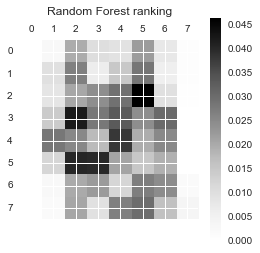

In [23]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X, y)
ranking = clf.feature_importances_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking)
plt.colorbar()
plt.title("Random Forest ranking\n")
plt.show()

### 2.3 Feature selection with cross-validation 

Number of features corresponding to max CV score : 8


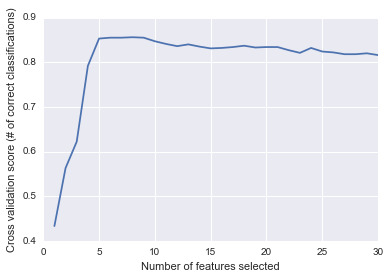

In [24]:
# Build a classification task using 3 informative features
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=30, n_informative=5,
                           n_redundant=4, n_repeated=0, n_classes=4,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = sklearn.svm.SVC(kernel="linear", class_weight="balanced")
rfecv = sklearn.feature_selection.RFECV(estimator=svc,
                                        step=1,
                                        cv=sklearn.model_selection.StratifiedKFold(2),
                                        scoring='accuracy')
rfecv.fit(X, y)

print("Number of features corresponding to max CV score : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Exercises

1. Apply feature selection to the [Olivetti faces dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces),
    identifying the most important 25% of features.
2. Apply PCA and T-SNE to the digits dataset

### Optional exercise:

* Use BRCA gene expression data. Apply K-means clustering to the original expression data and to the result of NMF decomposition with 10 components (H matrix). For simplicity, use k=10 as the number of clusters in K-means. Calculate adjusted_rand_score as a measure of consensus between the two resulting sets of clustering labels.
